### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk

In [3]:
# Read in data
dataset = pd.read_csv(r"C:\Users\Owoseni Timileyin\Desktop\Covenant Masters\Thesis\Ecommerce\MainProject\FinalData\SentimentDataSet10kKidsTablet.csv")
print(dataset.shape)


(10966, 4)


In [4]:
dataset.head()

,Id,Ratings,Text,Summary
0,AVphgVaX1cnluZ0-DR74,4,"Good basic tablet for checking email , web bro...",Good
1,AVphgVaX1cnluZ0-DR74,5,I love this tablet. It was a great buy. I woul...,Great tablet!
2,AVphgVaX1cnluZ0-DR74,5,"Brought my old tablet in to my local store, an...",Good tablet for a low price.
3,AVphgVaX1cnluZ0-DR74,4,Good Inexpensive tablet for someone that does ...,Good tablet for a beginner
4,AVphgVaX1cnluZ0-DR74,4,I got this for my niece. I would say this prod...,Great for kids


In [5]:
dataset['Ratings'].value_counts()

5    6495
4    3447
3     696
2     166
1     162
Name: Ratings, dtype: int64

### Quick EDA to have an idea of the data

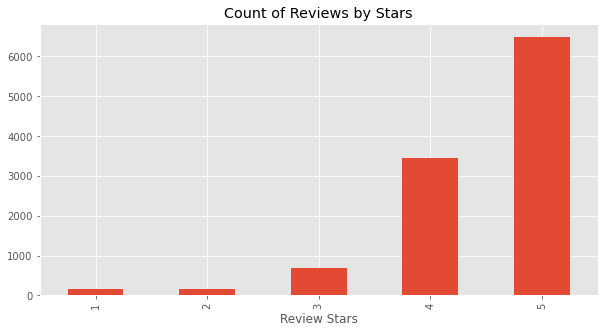

In [6]:
ax=dataset['Ratings'].value_counts().sort_index() \
.plot(kind = 'bar',title = 'Count of Reviews by Stars', figsize =(10,5))
ax.set_xlabel('Review Stars')
plt.show()

In [7]:
dataset.drop('Id', axis = 1, inplace= True)
dataset = dataset.reset_index()
dataset = dataset.rename(columns={'index':'Id'})

### VADER Sentiment Scoring
  - We will use the NLTK's SentimentIntensity Analyzer to get the neg/pos/neu scores of the text

- This uses a "bag of words" approach"

       - Stop words are removed
       - Each word is scored and combined to a total score

In [8]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

In [9]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(dataset.iterrows(), total = len(dataset)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)
    

  0%|          | 0/10966 [00:00<?, ?it/s]

In [10]:
pd.DataFrame(res)

,0,1,2,3,4,5,6,7,8,9,...,10956,10957,10958,10959,10960,10961,10962,10963,10964,10965
neg,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0580,0.0000,0.0000,...,0.1170,0.0,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1070
neu,0.7750,0.5190,0.7980,0.7910,0.8600,0.5730,0.6750,0.8150,0.7720,0.7080,...,0.8170,1.0,0.414,0.4970,0.7150,0.7480,0.5650,0.7480,0.7960,0.5800
pos,0.2250,0.4810,0.2020,0.2090,0.1400,0.4270,0.3250,0.1270,0.2280,0.2920,...,0.0650,0.0,0.586,0.5030,0.2850,0.2520,0.4350,0.2520,0.2040,0.3120
compound,0.4404,0.9161,0.8858,0.4404,0.7579,0.8481,0.8479,0.4215,0.9274,0.9349,...,-0.4404,0.0,0.872,0.7256,0.6114,0.5719,0.8957,0.5719,0.3182,0.6802


In [11]:
vaders = pd.DataFrame(res).T
vaders= vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(dataset, how ='left' )
vaders

,Id,neg,neu,pos,compound,Ratings,Text,Summary
0,0,0.000,0.775,0.225,0.4404,4,"Good basic tablet for checking email , web bro...",Good
1,1,0.000,0.519,0.481,0.9161,5,I love this tablet. It was a great buy. I woul...,Great tablet!
2,2,0.000,0.798,0.202,0.8858,5,"Brought my old tablet in to my local store, an...",Good tablet for a low price.
3,3,0.000,0.791,0.209,0.4404,4,Good Inexpensive tablet for someone that does ...,Good tablet for a beginner
4,4,0.000,0.860,0.140,0.7579,4,I got this for my niece. I would say this prod...,Great for kids
...,...,...,...,...,...,...,...,...
10961,10961,0.000,0.748,0.252,0.5719,5,I bought this tablet for my grandson in 4th gr...,Great for a 4th grader
10962,10962,0.000,0.565,0.435,0.8957,5,I have bought 3 of these tablets for my great ...,great for children
10963,10963,0.000,0.748,0.252,0.5719,5,Bought this for my four year old niece and she...,Loved it
10964,10964,0.000,0.796,0.204,0.3182,4,Its exactly what I am wanted and the price was...,Happy Buy


In [12]:
# Now we have sentiment score and metadata
vaders.tail(20)

,Id,neg,neu,pos,compound,Ratings,Text,Summary
10946,10946,0.000,0.613,0.387,0.8481,5,Great tablet. I use it to read only. Bought an...,Loved it!
10947,10947,0.000,0.637,0.363,0.8122,4,"Tablet was easy to setup and use, bought for k...",Good for kids
10948,10948,0.000,0.460,0.540,0.9144,5,My son seems more than happy with his B'day gi...,Amazon Kindle Tab
10949,10949,0.000,0.827,0.173,0.6588,5,This item is a deal at $49. Does everything yo...,Fire is On Fire
10950,10950,0.000,0.432,0.568,0.8885,4,"Excellent tablet, Easy to use and very fast. I...",great tablet
10951,10951,0.131,0.710,0.158,0.1280,5,"My Fire is easy to use, lightweight, and small...",Easy to use.
10952,10952,0.000,0.760,0.240,0.6249,5,The fore lived up to its reviews. Great tablet...,Great value
10953,10953,0.000,0.616,0.384,0.8165,5,very easy to use. was bought to use with Kindl...,GOOD TABLET
10954,10954,0.000,1.000,0.000,0.0000,5,"my daughter cant put this thing down, so it's ...",perfect diversion for kids
10955,10955,0.000,0.538,0.462,0.8834,5,My children just loves this tablet. It's easy ...,My children loves it


### Plot VADER Results

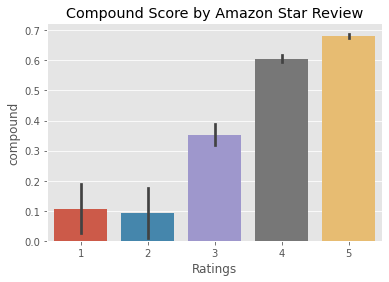

In [13]:
ax = sns.barplot(data = vaders, x='Ratings', y = 'compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

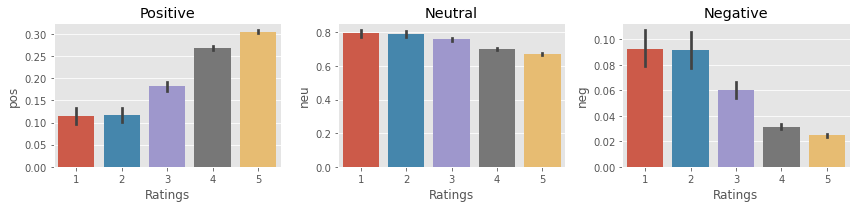

In [14]:
fig, axs = plt.subplots(1,3, figsize = (12,3))
sns.barplot(data=vaders, x='Ratings', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Ratings', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Ratings', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()


In [15]:
vaders.head(10)

,Id,neg,neu,pos,compound,Ratings,Text,Summary
0,0,0.000,0.775,0.225,0.4404,4,"Good basic tablet for checking email , web bro...",Good
1,1,0.000,0.519,0.481,0.9161,5,I love this tablet. It was a great buy. I woul...,Great tablet!
2,2,0.000,0.798,0.202,0.8858,5,"Brought my old tablet in to my local store, an...",Good tablet for a low price.
3,3,0.000,0.791,0.209,0.4404,4,Good Inexpensive tablet for someone that does ...,Good tablet for a beginner
4,4,0.000,0.860,0.140,0.7579,4,I got this for my niece. I would say this prod...,Great for kids
5,5,0.000,0.573,0.427,0.8481,5,A great product for my kids and great learning...,Good for grade school
6,6,0.000,0.675,0.325,0.8479,5,Purchased for my toddler. Best investment yet....,Great tablet for all ages
7,7,0.058,0.815,0.127,0.4215,3,Buying this device I thought it could replace ...,Lack usability
8,8,0.000,0.772,0.228,0.9274,5,This is a great tablet for us seniors because ...,Great tablet for seniors
9,9,0.000,0.708,0.292,0.9349,5,Nice tablet for the price. Got it for my son B...,Nice tablet


In [16]:
# Tutorial by Priyanka Sharma

In [17]:
# New Sentiment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk

In [18]:
# Read in data
dataset = pd.read_csv(r"C:\Users\Owoseni Timileyin\Desktop\Covenant Masters\Thesis\Ecommerce\MainProject\FinalData\SentimentDataSet10kKidsTablet.csv")
print(dataset.shape)
dataset.head()

(10966, 4)


,Id,Ratings,Text,Summary
0,AVphgVaX1cnluZ0-DR74,4,"Good basic tablet for checking email , web bro...",Good
1,AVphgVaX1cnluZ0-DR74,5,I love this tablet. It was a great buy. I woul...,Great tablet!
2,AVphgVaX1cnluZ0-DR74,5,"Brought my old tablet in to my local store, an...",Good tablet for a low price.
3,AVphgVaX1cnluZ0-DR74,4,Good Inexpensive tablet for someone that does ...,Good tablet for a beginner
4,AVphgVaX1cnluZ0-DR74,4,I got this for my niece. I would say this prod...,Great for kids


In [19]:
#Text preprocessing using textblob
!pip install textblob

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)


In [20]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
# Lower casting and removing punctuations
dataset['Text'] = dataset['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [21]:
# Removing of the punctuations
dataset['Text'] = dataset['Text'].str.replace('[^\w\s]', "")
dataset.Text.head(5)

C:\Users\Owoseni Timileyin\AppData\Local\Temp\ipykernel_19344\3981590700.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['Text'] = dataset['Text'].str.replace('[^\w\s]', "")


0    good basic tablet for checking email  web brow...
1    i love this tablet it was a great buy i would ...
2    brought my old tablet in to my local store and...
3    good inexpensive tablet for someone that does ...
4    i got this for my niece i would say this produ...
Name: Text, dtype: object

In [22]:
# Removing of Stop Words
stop = stopwords.words('english')
dataset['Text'] = dataset['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dataset.Text.head()

0    good basic tablet checking email web browsing ...
1    love tablet great buy would strongly recommend...
2    brought old tablet local store said would need...
3            good inexpensive tablet someone use often
4    got niece would say product sturdy enough kids...
Name: Text, dtype: object

In [23]:
 # Lemmatization
dataset['Text'] = dataset['Text'].apply(lambda x:" ".join([Word(word).lemmatize() for word in x.split()]))
dataset.Text.head()

0    good basic tablet checking email web browsing ...
1    love tablet great buy would strongly recommend...
2    brought old tablet local store said would need...
3            good inexpensive tablet someone use often
4    got niece would say product sturdy enough kid ...
Name: Text, dtype: object

In [24]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [25]:
dataset.columns

Index(['Id', 'Ratings', 'Text', 'Summary'], dtype='object')

In [26]:
dataset.Ratings.value_counts()

5    6495
4    3447
3     696
2     166
1     162
Name: Ratings, dtype: int64

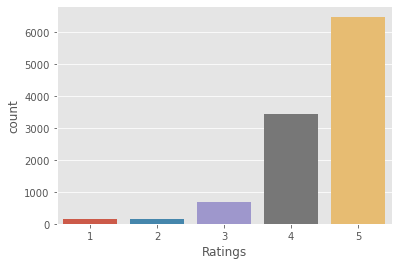

In [27]:
sns.countplot(data =dataset, x = 'Ratings')
plt.show()

In [37]:
# Create a new data frame "reviews" to perform exploratory data analysis
reviews = dataset
# Dropping null valuess
reviews.dropna(inplace = True)

In [38]:
score_1 = reviews[reviews['Ratings'] == 1]
score_2 = reviews[reviews['Ratings'] == 2]
score_3 = reviews[reviews['Ratings'] == 3]
score_4 = reviews[reviews['Ratings'] == 4]
score_5 = reviews[reviews['Ratings'] == 5]

In [39]:
reviews_sample = pd.concat([score_1, score_2, score_3, score_4, score_5], axis = 0)
reviews_sample.reset_index(drop = True, inplace= True)

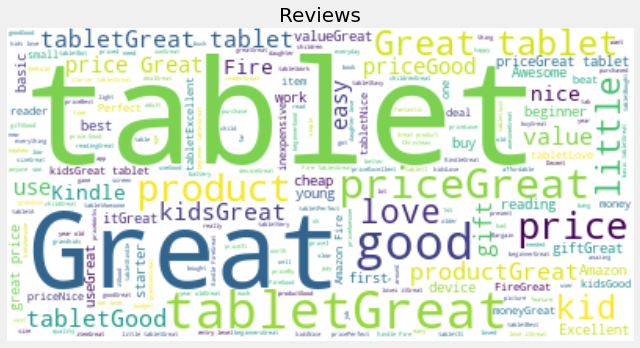

In [40]:
# wordclod function's imput needs to be a single string
# similarly you can build for Text column
# concatenating all summaries into a single string
reviews_str = reviews_sample.Summary.str.cat()
wordcloud = WordCloud(background_color = "white").generate(reviews_str)
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.title("Reviews", fontsize = 20)
plt.show()

In [41]:
#Now let's split the data into Negative (Rating is 1 or 2) and Positive (4 or 5)reviews
negative_reviews = reviews_sample[reviews_sample['Ratings'].isin([1,2])]
positive_reviews = reviews_sample[reviews_sample['Ratings'].isin([1,2])]
# Transforming to single string
negative_reviews_str = negative_reviews.Summary.str.cat()
positive_reviews_str = positive_reviews.Summary.str.cat()

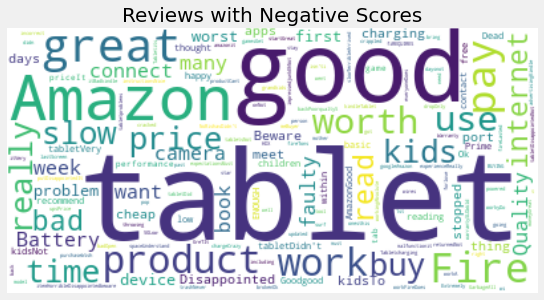

In [42]:
# creating wordcloud
wordcloud_negative = WordCloud(background_color = "white").generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color = "white").generate(positive_reviews_str)
# plot
# plot
fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(212)
ax1.imshow(wordcloud_negative, interpolation = 'bilinear')
ax1.axis("off")
ax1.set_title("Reviews with Negative Scores", fontsize = 20)
plt.show()

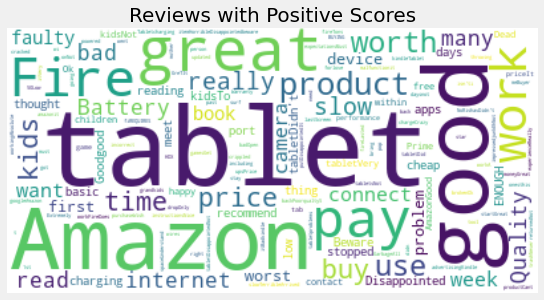

In [43]:
# plot
fig = plt.figure(figsize = (10, 10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive, interpolation = 'bilinear')
ax2.axis("off")
ax2.set_title("Reviews with Positive Scores", fontsize = 20)
plt.show()

In [44]:
# Sentiment Score Using VADER Sentiment
#Vader is a valence aware dictionary and sentiment reasoner, 
#it is a lexicon and rule-based sentiment analysis tool that is 
#specially attuned to sentiments expressed in social media. 
#Vader uses a combination of a sentiment lexicon
#sentiment lexicon is a list of lexical features e.g. words which are 
#generally labeled according to their semantic orientation as either positive or negative
# Vader not only tells about the positive or negative score
#but also tells us about how positive or negative a sentiment is
# pretrained model takes the input from the 
#text description and outputs the sentiment score from -1 to +1

In [45]:
import seaborn as sns
import re
import os
import sys
import ast
plt.style.use('fivethirtyeight')
#Function for getting the sentiment
cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [46]:
# Generating sentiment for all the sentence in the dataset
emptyline = []
for row in dataset['Text']:
    vs = analyzer.polarity_scores(row)
    emptyline.append(vs)
# Creating new dataframe with sentiments
dataset_sentiments = pd.DataFrame(emptyline)
dataset_sentiments.sample(5)

,neg,neu,pos,compound
3200,0.000,1.000,0.000,0.0000
3218,0.000,0.461,0.539,0.8481
384,0.000,0.390,0.610,0.7402
7347,0.000,0.326,0.674,0.9246
8682,0.125,0.612,0.263,0.4459


In [47]:
# Merging the sentiments back to reviews dataframe
dataset_c = pd.concat([dataset.reset_index(drop = True), dataset_sentiments], axis = 1)
dataset_c.head(3)

,Id,Ratings,Text,Summary,neg,neu,pos,compound
0,AVphgVaX1cnluZ0-DR74,4,good basic tablet checking email web browsing ...,Good,0.0,0.734,0.266,0.4404
1,AVphgVaX1cnluZ0-DR74,5,love tablet great buy would strongly recommend...,Great tablet!,0.0,0.287,0.713,0.9633
2,AVphgVaX1cnluZ0-DR74,5,brought old tablet local store said would need...,Good tablet for a low price.,0.0,0.747,0.253,0.7964


In [48]:
# convert scores into positive and negative sentiments using some threshold
dataset_c['Sentiment'] = np.where(dataset_c['compound'] >= 0, 'Positive', 'Negative')
dataset_c.sample(20)

,Id,Ratings,Text,Summary,neg,neu,pos,compound,Sentiment
3039,AVphgVaX1cnluZ0-DR74,5,great daughter mom love,great,0.000,0.194,0.806,0.8519,Positive
3258,AVphgVaX1cnluZ0-DR74,5,love new tablet got bring u 2 year old go pric...,Great for cost,0.068,0.463,0.469,0.9186,Positive
2103,AVphgVaX1cnluZ0-DR74,5,tablet work great 7 year old son love app stor...,Great tablet for children,0.000,0.505,0.495,0.8957,Positive
8644,AVphgVaX1cnluZ0-DR74,5,love fire much plus read book online also,Love my Fire,0.190,0.476,0.333,0.4215,Positive
8031,AVphgVaX1cnluZ0-DR74,4,would recommend product anyone budget want som...,Awesome Tablet for the price,0.000,0.760,0.240,0.6486,Positive
4190,AVphgVaX1cnluZ0-DR74,3,decent product price compared others price range,Good,0.000,1.000,0.000,0.0000,Positive
6471,AVphgVaX1cnluZ0-DR74,5,christmas gift family member absolutely loved,Gift,0.000,0.361,0.639,0.7960,Positive
3041,AVphgVaX1cnluZ0-DR74,5,holding ipad mini took look tablet became clea...,Love this tablet!,0.137,0.539,0.323,0.5849,Positive
5132,AVphgVaX1cnluZ0-DR74,5,kindle fire excellent tablet price member fami...,Excellent tablet,0.140,0.523,0.337,0.5267,Positive
2948,AVphgVaX1cnluZ0-DR74,5,major reader love carry hundred book read when...,Excellent!,0.000,0.548,0.452,0.6983,Positive


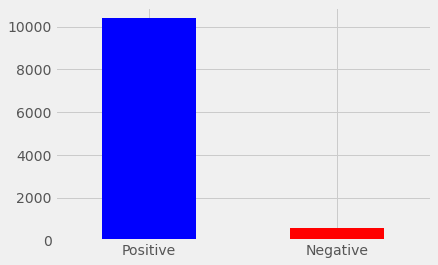

In [49]:
# Result
result = dataset_c['Sentiment'].value_counts()
result.plot(kind = 'bar',rot = 0, color = ['blue','red']);